In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py
import torch
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
np.set_printoptions(precision=2, suppress=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


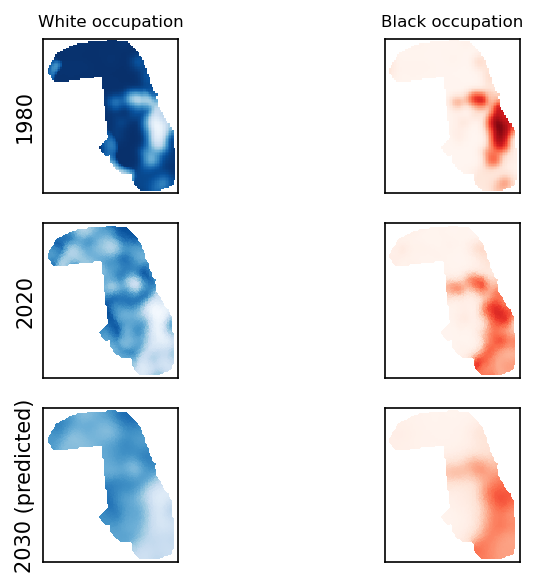

In [44]:
import dolfin_adjoint as d_ad
from data_processing import scalar_img_to_mesh
def plot_mesh(ax, f, mesh, lw=False, scale=1, vmin=0, vmax=1, **kwargs):
    x, y = mesh.coordinates()[:, 0], mesh.coordinates()[:, 1]
    tri = mesh.cells()
    if lw:
        kwargs['edgecolors'] = 'black'
        kwargs['linewidth'] = 0.05
    if not isinstance(f, np.ndarray):
        ax.tripcolor(x, y, f.compute_vertex_values() * scale, triangles=tri, vmin=vmin, vmax=vmax, **kwargs)
    else:
        ax.tripcolor(x, y, f * scale, triangles=tri, vmin=vmin, vmax=vmax, **kwargs)
    ax.set(xticks=[], yticks=[])

from data_processing import StationaryDataset
county = 'cook_IL'
dataset = StationaryDataset(county)

fig, ax = plt.subplots(3, 2, dpi=150, sharey=True, sharex=True)

sample = dataset.get_time(1980)
ax[0,0].pcolormesh(sample['x'], sample['y'], sample['wb0'][0], cmap='Blues', vmax=1, vmin=0)
ax[0,1].pcolormesh(sample['x'], sample['y'], sample['wb0'][1], cmap='Reds', vmax=1, vmin=0)

sample = dataset[30]

#Generate fields on mesh
V = sample['FctSpace']
N = V.dim()
Dww = d_ad.Function(V)
Dwb = d_ad.Function(V)
Dbw = d_ad.Function(V)
Dbb = d_ad.Function(V)
w0 = d_ad.Function(V)
b0 = d_ad.Function(V)

Dww.vector()[:] = sample['control_arr'][:N]
Dwb.vector()[:] = sample['control_arr'][N:2*N]
Dbw.vector()[:] = sample['control_arr'][2*N:3*N]
Dbb.vector()[:] = sample['control_arr'][3*N:4*N]

GammaW = d_ad.Constant(sample['control_arr'][4*N], name='gammaW')
GammaB = d_ad.Constant(sample['control_arr'][4*N+1], name='gammaB')
dt = d_ad.Constant(sample['dt'], name='dt')
#w0 = scalar_img_to_mesh(sample['wb0'][0], sample['x'], sample['y'], sample['FctSpace'])
#b0 = scalar_img_to_mesh(sample['wb0'][1], sample['x'], sample['y'], sample['FctSpace'])
w0.vector()[:] = sample['control_arr'][4*N+3:5*N+3]
b0.vector()[:] = sample['control_arr'][5*N+3:6*N+3]

wb, _, _ = sample['pde_forward'](Dww, Dwb, Dbw, Dbb, GammaW, GammaB, 10, w0, b0, dataset.mesh)
w1, b1 = wb.split(True)

plot_mesh(ax[1,0], w0, dataset.mesh, cmap='Blues')
plot_mesh(ax[1,1], b0, dataset.mesh, cmap='Reds')

plot_mesh(ax[2,0], w1, dataset.mesh, cmap='Blues')
plot_mesh(ax[2,1], b1, dataset.mesh, cmap='Reds')

ax[0,0].set_title('White occupation', fontsize=8)
ax[0,1].set_title('Black occupation', fontsize=8)
ax[0,0].set_ylabel('1980')
ax[1,0].set_ylabel('2020')
ax[2,0].set_ylabel('2030 (predicted)')
for a in ax.flatten():
    a.set_aspect('equal')
    a.set(xticks=[], yticks=[])
plt.tight_layout()


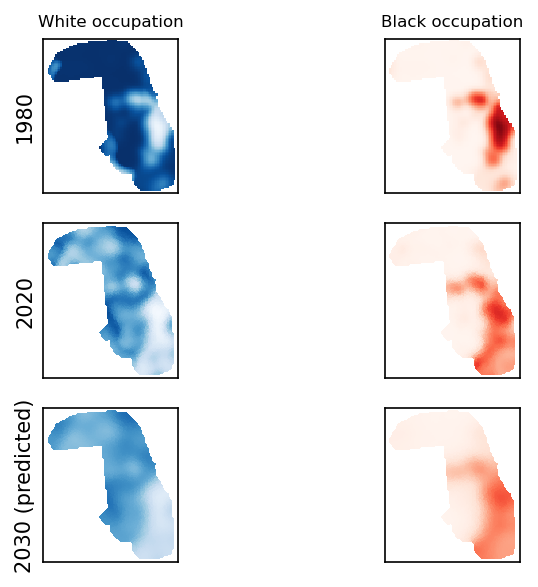

In [38]:
import dolfin_adjoint as d_ad
from data_processing import scalar_img_to_mesh
def plot_mesh(ax, f, mesh, lw=False, scale=1, vmin=0, vmax=1, **kwargs):
    x, y = mesh.coordinates()[:, 0], mesh.coordinates()[:, 1]
    tri = mesh.cells()
    if lw:
        kwargs['edgecolors'] = 'black'
        kwargs['linewidth'] = 0.05
    if not isinstance(f, np.ndarray):
        ax.tripcolor(x, y, f.compute_vertex_values() * scale, triangles=tri, vmin=vmin, vmax=vmax, **kwargs)
    else:
        ax.tripcolor(x, y, f * scale, triangles=tri, vmin=vmin, vmax=vmax, **kwargs)
    ax.set(xticks=[], yticks=[])

from data_processing import CensusDataset
county = 'cook_IL'
dataset = CensusDataset(county)

fig, ax = plt.subplots(3, 2, dpi=150, sharey=True, sharex=True)

sample = dataset.get_time(1980)
ax[0,0].pcolormesh(sample['x'], sample['y'], sample['wb0'][0], cmap='Blues', vmax=1, vmin=0)
ax[0,1].pcolormesh(sample['x'], sample['y'], sample['wb0'][1], cmap='Reds', vmax=1, vmin=0)

sample = dataset[30]

#Generate fields on mesh
V = sample['FctSpace']
N = V.dim()
Dww = d_ad.Function(V)
Dwb = d_ad.Function(V)
Dbw = d_ad.Function(V)
Dbb = d_ad.Function(V)
w0 = d_ad.Function(V)
b0 = d_ad.Function(V)

Dww.vector()[:] = sample['control_arr'][:N]
Dwb.vector()[:] = sample['control_arr'][N:2*N]
Dbw.vector()[:] = sample['control_arr'][2*N:3*N]
Dbb.vector()[:] = sample['control_arr'][3*N:4*N]

GammaW = d_ad.Constant(sample['control_arr'][4*N], name='gammaW')
GammaB = d_ad.Constant(sample['control_arr'][4*N+1], name='gammaB')
dt = d_ad.Constant(sample['dt'], name='dt')
#w0 = scalar_img_to_mesh(sample['wb0'][0], sample['x'], sample['y'], sample['FctSpace'])
#b0 = scalar_img_to_mesh(sample['wb0'][1], sample['x'], sample['y'], sample['FctSpace'])
w0.vector()[:] = sample['control_arr'][4*N+3:5*N+3]
b0.vector()[:] = sample['control_arr'][5*N+3:6*N+3]

wb, _, _ = sample['pde_forward'](Dww, Dwb, Dbw, Dbb, GammaW, GammaB, 10, w0, b0, dataset.mesh)
w1, b1 = wb.split(True)

plot_mesh(ax[1,0], w0, dataset.mesh, cmap='Blues')
plot_mesh(ax[1,1], b0, dataset.mesh, cmap='Reds')

plot_mesh(ax[2,0], w1, dataset.mesh, cmap='Blues')
plot_mesh(ax[2,1], b1, dataset.mesh, cmap='Reds')

ax[0,0].set_title('White occupation', fontsize=8)
ax[0,1].set_title('Black occupation', fontsize=8)
ax[0,0].set_ylabel('1980')
ax[1,0].set_ylabel('2020')
ax[2,0].set_ylabel('2030 (predicted)')
for a in ax.flatten():
    a.set_aspect('equal')
    a.set(xticks=[], yticks=[])
plt.tight_layout()


In [35]:
from pbnn import PBNN
from time import time
import dolfin_adjoint as d_ad
from tqdm.auto import tqdm

model = PBNN().to(device)
opt = torch.optim.Adam(model.parameters(), lr=3e-4)
sch = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.98)
loss_history = []

d_ad.set_working_tape(d_ad.Tape())

gammas_init = torch.ones(2, dtype=torch.float, device=device)

n_epochs = 100
step = 0
batch_size = 8

with tqdm(total=n_epochs) as pbar, \
     tqdm(total=n_epochs*len(dataset)) as ebar:
    for epoch in range(n_epochs):
        for i in range(len(dataset)):
            batch = dataset[i]
            batch['wb0'] = batch['wb0'].to(device)
            batch['Dij'] = batch['Dij'].to(device)
            batch['gammas'] = gammas_init
            batch['mask'] = torch.BoolTensor(batch['mask']).to(device)

            loss, Dij, gammas = model.pretrain(batch)
            loss_history.append(loss.item())
            step += 1
            ebar.update()

            if step % batch_size == 0:
                pbar.set_postfix(
                    loss=np.mean(loss_history[-batch_size:]),
                    gammas=gammas)

                opt.step()
                d_ad.set_working_tape(d_ad.Tape())
                opt.zero_grad()
                    
        
        torch.save(
            {
                'state_dict': model.state_dict(),
                'loss_history': loss_history,
            },
            'pbnn_pretrain.ckpt')

        sch.step()
        pbar.update()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

KeyboardInterrupt: 

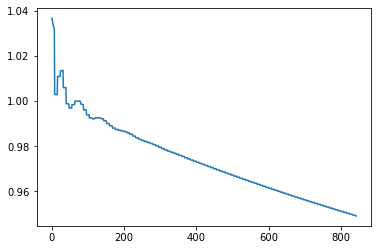

In [26]:
plt.plot(loss_history)

In [30]:
info = torch.load('pbnn_pretrain.ckpt')
model = PBNN().to(device)
model.load_state_dict(info['state_dict'])

opt = torch.optim.Adam(model.parameters(), lr=3e-4)
sch = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.98)
train_loss = []
val_loss = []


gammas_init = torch.ones(2, dtype=torch.float, device=device)

n_epochs = 100
step = 0
batch_size = 8

with tqdm(total=n_epochs) as pbar:
    for epoch in range(n_epochs):
        dataset.training()
        d_ad.set_working_tape(d_ad.Tape())

        with tqdm(total=len(dataset), leave=False) as ebar:
            for i in range(len(dataset)):
                batch = dataset[i]
                batch['wb0'] = batch['wb0'].to(device)
                
                Dij, Dij_mesh, constants, J, dJdD = model.training_step(batch)
                train_loss.append(J)
                step += 1
                ebar.update()

                if step % batch_size == 0:
                    pbar.set_postfix(
                        loss=np.mean(train_loss[-batch_size:]),
                        gammas=gammas)

                    opt.step()
                    d_ad.set_working_tape(d_ad.Tape())
                    opt.zero_grad()
                    
        dataset.validate()
        val_loss.append(0)
        
        with tqdm(total=len(dataset), leave=False) as ebar:
            with torch.no_grad():
                for i in range(len(dataset)):
                    d_ad.set_working_tape(d_ad.Tape())

                    batch = dataset[i]
                    batch['wb0'] = batch['wb0'].to(device)

                    Dij, Dij_mesh, constants, J = model.validation_step(batch)
                    val_loss[epoch] += J
                    ebar.update()

        
        torch.save(
            {
                'state_dict': model.state_dict(),
                'val_loss': val_loss,
                'train_loss': train_loss,
            },
            f'{model.__class__.__name__}.ckpt')

        sch.step()
        pbar.update()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

KeyboardInterrupt: 

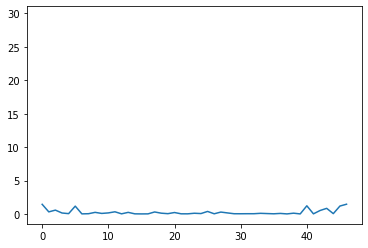

In [31]:
plt.plot(train_loss)
plt.plot(val_loss)

# Older version

In [ ]:
from pbnn import PBNN
from time import time
import dolfin_adjoint as d_ad
from tqdm.auto import tqdm

model = PBNN().to(device)
opt = torch.optim.Adam(model.parameters(), lr=3e-4)
sch = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.995)
batch_size = 8
loss_history = []

d_ad.set_working_tape(d_ad.Tape())

loader = iter(dataset)

gammas_init = torch.ones(2, dtype=torch.float, device=device)

n_steps = 50000

with tqdm(total=n_steps) as pbar:
    for step in range(n_steps):
        t = time()

        batch = next(loader)
        batch['wb0'] = batch['wb0'].to(device)
        batch['Dij'] = batch['Dij_init'].to(device)
        batch['gammas'] = gammas_init
        batch['mask'] = torch.BoolTensor(batch['mask']).to(device)
        
        loss, Dij, gammas = model.pretrain(batch)
        loss_history.append(loss.item())

        if step > 0 and step % batch_size == 0:
            print(f'Time = {time() - t:.3g}\tLoss = {np.mean(loss_history[-batch_size:]):.5g}, Gammas={model.gammas.detach().cpu().numpy()}')

            opt.step()
            sch.step()
            d_ad.set_working_tape(d_ad.Tape())

            torch.save(
                {
                    'state_dict': model.state_dict(),
                    'loss_history': loss_history,
                },
                'pbnn_pretrain.ckpt')

        pbar.update()

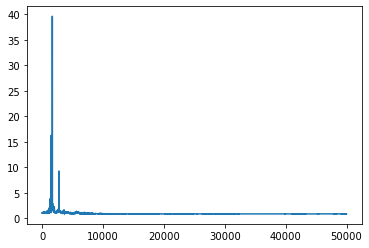

In [4]:
plt.plot(loss_history)

In [ ]:
info = torch.load('pbnn_pretrain.ckpt')
model = PBNN().to(device)
model.load_state_dict(info['state_dict'])

opt = torch.optim.Adam(model.parameters(), lr=3e-4)
sch = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.995)
batch_size = 8
loss_history = []

d_ad.set_working_tape(d_ad.Tape())

loader = iter(dataset)

with tqdm(total=n_steps) as pbar:
    for step in range(n_steps):
        t = time()
        batch = next(loader)

        Dij, Dij_mesh, constants, J, dJdD = model.step(
            batch['wb0'].to(device),
            batch['Jhat'],
            batch['control_arr'],
            batch['FctSpace'],
            (batch['x'], batch['y']),
            batch['dt']
        )
        loss_history.append(J)

        if step > 0 and step % batch_size == 0:
            print(f'Time = {time() - t:.3g}\tLoss = {np.mean(loss_history[-batch_size:]):.5g}, Gammas={model.gammas.detach().cpu().numpy()}')

            opt.step()
            sch.step()
            d_ad.set_working_tape(d_ad.Tape())

            torch.save(
                {
                    'state_dict': model.state_dict(),
                    'loss_history': loss_history,
                },
                'pbnn.ckpt')

        pbar.update()

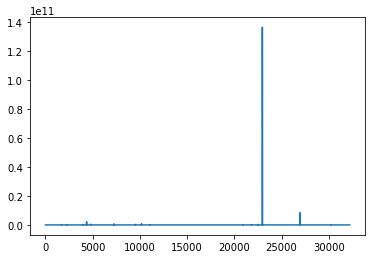

In [6]:
plt.plot(loss_history)